In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils
import cmath
from math import log, ceil
import pylab as plt
import cv2
from scipy import misc

/home/trymg/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## utils

In [3]:
def omega(p, q):
    ''' The omega term in DFT and IDFT formulas'''
    return cmath.exp((2.0 * cmath.pi * 1j * q) / p)

def pad(lst):
    '''padding the list to next nearest power of 2 as FFT implemented is radix 2'''
    k = 0
    while 2**k < len(lst):
        k += 1
    return np.concatenate((lst, ([0] * (2 ** k - len(lst)))))

def pad2(x):
    m, n = np.shape(x)
    M, N = 2 ** int(ceil(log(m, 2))), 2 ** int(ceil(log(n, 2)))
    F = np.zeros((M,N), dtype = x.dtype)
    F[0:m, 0:n] = x
    return F, m, n

## FFT

In [4]:
## FFT - 1D
def fft(x):
    ''' FFT of 1-d signals
    usage : X = fft(x)
    where input x = list containing sequences of a discrete time signals
    and output X = dft of x '''

    n = len(x)
    if n == 1:
        return x
    Feven, Fodd = fft(x[0::2]), fft(x[1::2])
    combined = [0] * n
    for m in range(n/2):
        combined[m] = Feven[m] + omega(n, -m) * Fodd[m]
        combined[m + n/2] = Feven[m] - omega(n, -m) * Fodd[m]
    return combined

In [5]:
## FFT - 2D
def fft2(f):
    '''FFT of 2-d signals/images with padding
    usage X, m, n = fft2(x), where m and n are dimensions of original signal'''

    f, m, n = pad2(f)
    return np.transpose(fft(np.transpose(fft(f)))), m, n

def ifft2(F, m, n):
    ''' IFFT of 2-d signals
    usage x = ifft2(X, m, n) with unpaded, 
    where m and n are odimensions of original signal before padding'''

    f, M, N = fft2(np.conj(F))
    f = np.matrix(np.real(np.conj(f)))/(M*N)
    return f[0:m, 0:n]

In [7]:
def convolve_im(im: np.array, fft_kernel: np.array, verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)

    padding = (im.shape[0] - fft_kernel.shape[0], im.shape[1] - fft_kernel.shape[1])  # total amount of padding
    fft_kernel = np.pad(fft_kernel, (((padding[0]+1)//2, padding[0]//2), ((padding[1]+1)//2, padding[1]//2)), 'constant')

    transformed = (np.fft.fft2(im) * fft_kernel)

    inversed = np.fft.ifft2(transformed)

    conv_result = np.real(inversed)
    
    # Use plt.subplot to place two or more images beside eachother
    plt.figure(figsize=(20, 4))
    # plt.subplot(num_rows, num_cols, position (1-indexed))

    # Visualize original image
    plt.subplot(1, 5, 1)
    plt.imshow(im, cmap="gray")

    # Visualize FFT
    plt.subplot(1, 5, 2) 
    plt.imshow(abs(np.log(np.fft.fftshift(np.fft.fft2(im)))), cmap="gray")

    # Visualize FFT kernel
    plt.subplot(1, 5, 3)
    plt.imshow(np.fft.fftshift(fft_kernel), cmap="gray")
    
    # Visualize filtered FFT image
    plt.subplot(1, 5, 4)
    plt.imshow(np.log(1+abs(np.fft.fftshift(np.real(transformed)))), cmap="gray")

    # Visualize filtered spatial image
    plt.subplot(1, 5, 5) 
    plt.imshow(np.real(inversed), cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result

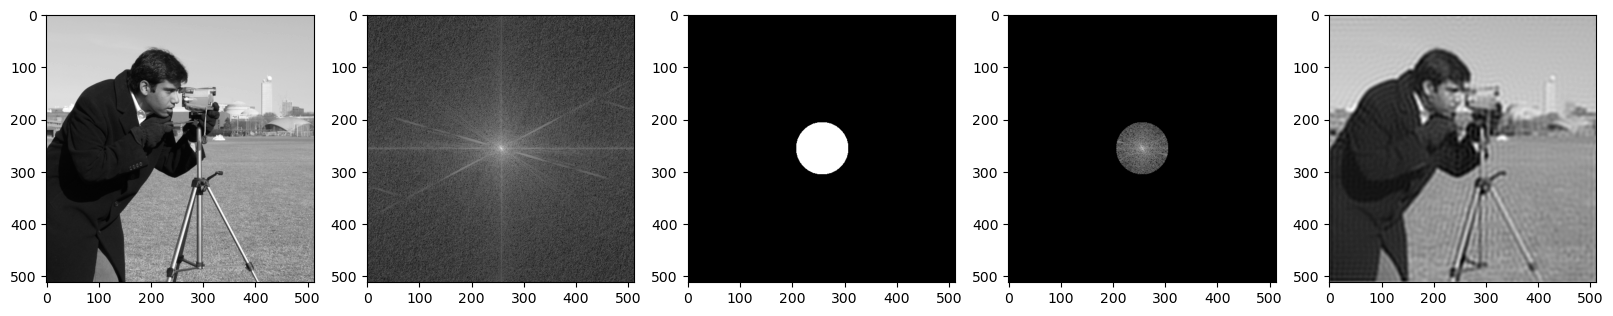

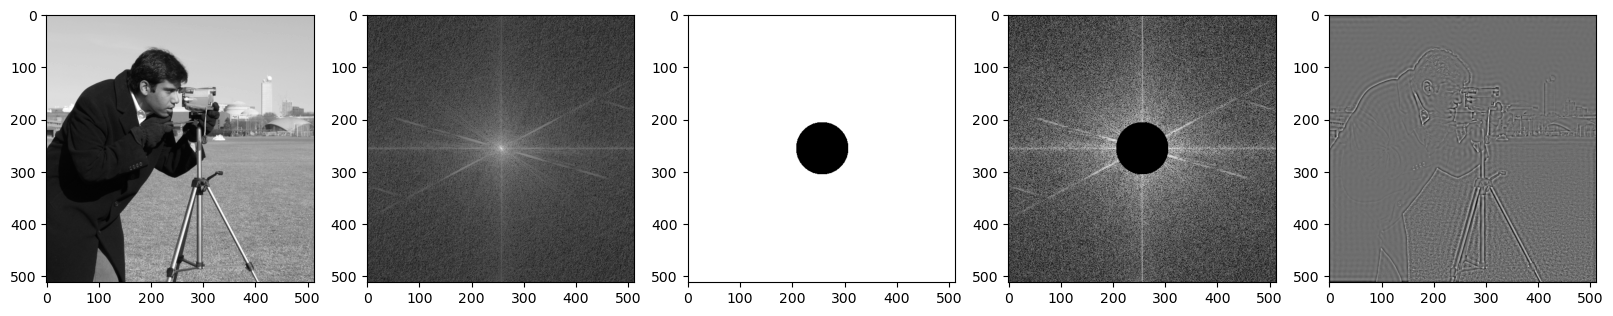

/home/trymg/Dropbox/master/semester 3/TDT4195 Grunnleggende visuell databehandling/exercises/image processing/2/utils.py:82: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


Saving image to: image_processed/camera_low_pass.png
Saving image to: image_processed/camera_high_pass.png


In [8]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im(im, frequency_kernel_low_pass, verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im(im, frequency_kernel_high_pass, verbose=verbose)
    
    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)